In [1]:
#### Loading nessessary libraries 

# for dealing with data in tabular form
import pandas as pd 
import numpy as np 

#for data visualization and plotting
import matplotlib.pyplot as plt
import seaborn as sns

#split data into training and testing parts
from sklearn.model_selection import train_test_split

#for building machine learning model
from sklearn.ensemble import RandomForestClassifier

#for evaluating model performance 
from sklearn.metrics import accuracy_score, classification_report

#for encoding categorical variables(e.g converting man/woman into 1/0)
from sklearn.preprocessing import LabelEncoder

In [2]:
### First load the dataset

# As titanic is a already present dataset in seaborn
df=sns.load_dataset("titanic")

In [3]:
# Loading the first 5 rows of the dataset to see if the importing was successful
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
features=["pclass","sex","age","sibsp","parch","fare"]
target=["survived"]

In [5]:
### Now let's replace the missing values

rep=df.columns[df.isnull().any()]
print(rep)

Index(['age', 'embarked', 'deck', 'embark_town'], dtype='object')


In [6]:
# So replace the missing values in 'age' with the median of the column
df['age'].fillna(df['age'].median(),inplace=True)

/tmp/ipykernel_238533/2867091398.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [7]:
# Now let's deal with the encoding of the 'sex' column into 1 and 0

le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])

In [8]:
# Now let's define the X and Y so we can train the model

X=df[features]
Y=df[target]

In [9]:
# Let's split the data now

X_Train, X_Test, Y_Train, Y_Test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Now we train the model

model=RandomForestClassifier(random_state=42)
model.fit(X_Train, Y_Train)

/usr/lib/python3.13/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# Now let's make a prediction

Y_Predict=model.predict(X_Test)

In [12]:
# Let's check the model now

accuracy=accuracy_score(Y_Test, Y_Predict)
print(f"The accuracy score is:{accuracy:.2f}")

print(f"The Classification Report is: {Y_Test, Y_Predict}")

The accuracy score is:0.80
The Classification Report is: (     survived
709         1
439         0
840         0
720         1
39          1
..        ...
433         0
773         0
25          1
84          1
10          1

[179 rows x 1 columns], array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1]))


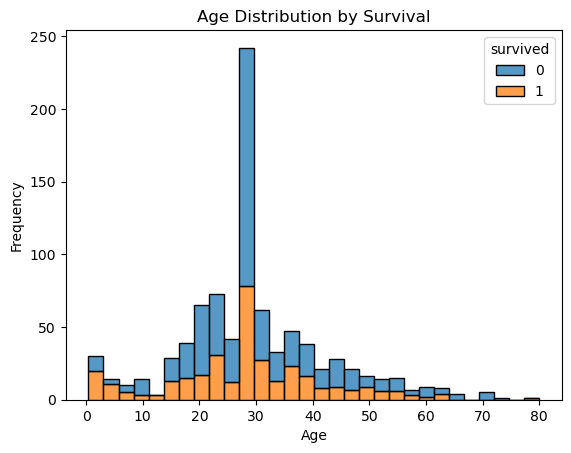

In [13]:
#### Now let's plot some graphs

# Age distribution by survival
# plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

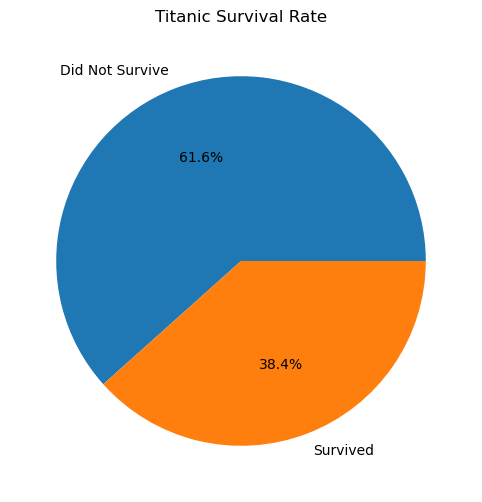

In [18]:
# Survival distribution

plt.figure(figsize=(8, 6))
survival_counts = df['survived'].value_counts()
plt.pie(survival_counts, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%')
plt.title('Titanic Survival Rate')
plt.show()

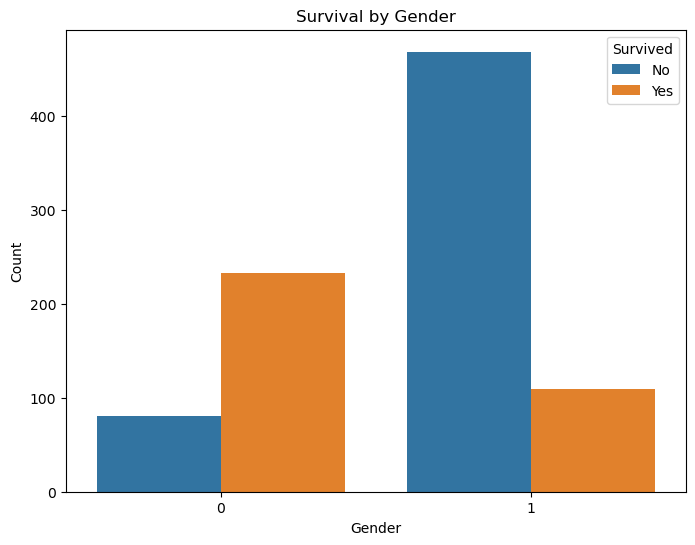

In [15]:
# Survival by gender

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()